In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.optimize import fmin_tnc

## Importiamo il DataSet
### In questo dataSet Vedremo:
*    Nelle prime 2 colonne i risultati degli ultimi due esami all'universita' di vari studenti
*    Nella terza colonna con i valori 1 o 0 se sono stati ammessi all'esame di laurea

In [2]:
data = pd.read_csv(r'C:\Users\Claud\OneDrive\Desktop\project-a\MASTER CLASS MACHINE LEARNING\Regressione lineare\data\exams_data.csv')
data.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


## Data l'assenza di nomi colonna li creiamo e riaggiungiamo la riga presente al posto di essi 

In [3]:
data.columns = ['1_Esame', '2_Esame', 'Ammissione']
data = data.append({'1_Esame' : 34.62365962451697, '2_Esame' : 78.0246928153624, 'Ammissione' : 0 }, ignore_index=True)
data.head()

C:\Users\Claud\AppData\Local\Temp\ipykernel_17420\685542195.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'1_Esame' : 34.62365962451697, '2_Esame' : 78.0246928153624, 'Ammissione' : 0 }, ignore_index=True)


,1_Esame,2_Esame,Ammissione
0,30.286711,43.894998,0.0
1,35.847409,72.902198,0.0
2,60.182599,86.308552,1.0
3,79.032736,75.344376,1.0
4,45.083277,56.316372,0.0


## Definiamo le variabili X , y

##  Creo un grafico che ci permette di vedere la struttura dei dati
*  Con i Scatter rossi vediamo i non ammessi 
*  Con i Scatter verdi vediamo gli ammessi



<function matplotlib.pyplot.show(close=None, block=None)>

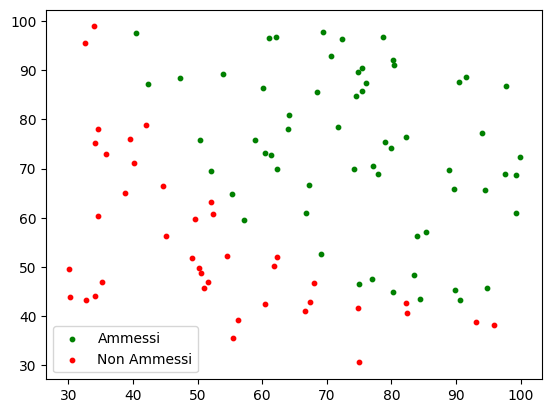

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
ammessi = data.loc[data['Ammissione'] == 1]
non_ammessi = data.loc[data['Ammissione'] == 0]

plt.scatter(ammessi.iloc[:,0], ammessi.iloc[:,1], s=10, label='Ammessi', color='green')
plt.scatter(non_ammessi.iloc[:,0], non_ammessi.iloc[:,1], s= 10, label = 'Non Ammessi', color = 'red')
plt.legend()
plt.show

###  Aggiungendo la colonna di 1, ogni esempio di input in X avrà come primo valore un 1, che sarà moltiplicato per theta0 per il calcolo del termine di "bias"

### Trasforma y da una Pandas Series in un array numpy per operazioni o manipolazioni piu efficenti

### Inizializzando theta con zeri, stiamo iniziando con dei valori di partenza per i parametri del modello.

In [5]:
X = np.c_[np.ones((X.shape[0], 1)), X]   # è stata aggiunta una colonna di 1 all'inizio dell'array X, ora ogni esempio ha come primo valore un 1, utilizzato di seguito per essere
                                         # moltiplicato per il primo parametro (theta0), il "bias" del modello
y = y.values # trasformo y da una Pandas Series in una lista 
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1],1))

### La formula per calcolare la  Regressione Logistica e' =  1 / ( 1 + exp - (Theta0 + Theta1X))

###  1) La Sigmoide si utilizza per alzare esponenzialmente (Y) oltre un certo limite (X) l'errore del modello e tale

###  funzione si calcola con   = 1 / (1 + exp(-z))

###  2) La formula per calcolare funzione di costo e' =  -Y * log(hθ( X)) - (1 - Y) * log(1 - hθ(X))]

### Funzione di costo per ogni singolo esempio = -(1/n) * Σ [Y * log(h(θ, X)) + (1 - Y) * log(1 - h(θ, X))]


### 3) La formula per calcolare il Gradiente e' = (1/n) * X^T * (hθ(X) - y)

### 4) La formula per calcolare la funzione Ipotesi e' = 1 / (1 + exp(-θ^T * x))



In [6]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def funz_costo(theta,x ,y):
    n = x.shape[0]
    costo_totale = -(1 / n) * np.sum(y * np.log(sigmoide(np.dot(x, theta))) + (1 - y) * np.log(1 - sigmoide(np.dot(x, theta))))
    return costo_totale

def gradiente(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoide(np.dot(x, theta)) - y)

## Addestramento modello

In [7]:
def fit(x, y, theta):
    opt_weights = fmin_tnc(func = funz_costo, x0 = theta, fprime=gradiente, args = (x, y.flatten()))
    return opt_weights[0]

parametri = fit(X, y, theta)

## Generiamo un grafico nel quale possiamo constatare che la nostra previsione e' la migliore per quanto possibile dalla regressione logistica 
## (Perche' per quanto possiamo osservare per raggiungere il 100% dell accuratezza delle previsioni del modello avremmo bisogno di una linea con una curvatura)

<function matplotlib.pyplot.show(close=None, block=None)>

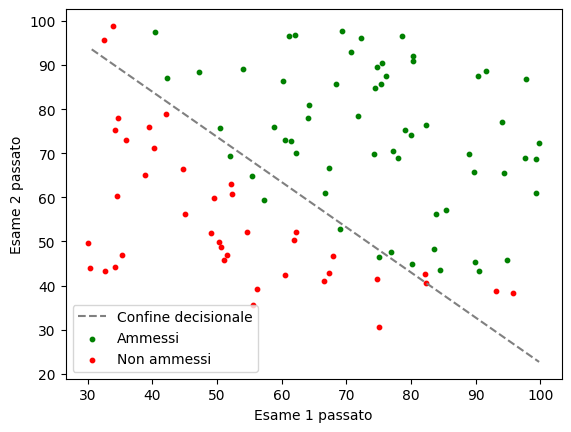

In [8]:
x_values = [np.min(X[:,-1]), np.max(X[:,1])]
y_values = - (parametri[0] + np.dot(parametri[1], x_values)) / parametri[2]

plt.plot(x_values, y_values, label = 'Confine decisionale', color = 'grey', linestyle = '--')
plt.xlabel('Esame 1 passato')
plt.ylabel('Esame 2 passato')
plt.scatter(ammessi.iloc[:,0], ammessi.iloc[:,1], s=10, label = 'Ammessi', color='green')
plt.scatter(non_ammessi.iloc[:,0], non_ammessi.iloc[:,1], s=10, label = 'Non ammessi', color = 'red')
plt.legend()
plt.show



### La formula dell ottimizzazione dei parametri con la discesa del gradiente = θ_j - α * ∂J(θ) / ∂θ_j

### Mentre per calcolare l'accuratezza: accuratezza = (numero di previsioni corrette) / (numero totale di esempi)

In [9]:
def predizioni(x):
    theta = parametri[:, np.newaxis]
    return sigmoide(np.dot(x , theta))

def accuratezza(x, classi_effettive, soglia_di_probabilita=0.5):
    classi_predizione = (predizioni(x) >= soglia_di_probabilita).astype(int)
    classi_predizione = classi_predizione.flatten()
    accuratezza = np.mean(classi_predizione == classi_effettive)
    return accuratezza * 100

print('Accuratezza', accuratezza(X, y.flatten()))
print('Parametri ottimizzati', parametri)
    

Accuratezza 89.0
Parametri ottimizzati [-25.16131867   0.20623159   0.20147149]


### Adesso andremo ad addestrare il nostro modello di regressione logistica utilizzando la libreria Sci-Kit Learn e come possiamo notare dall addestramento del modello l'accuratezza del modello sviluppato con le formule e l'accuratezza del modello addestrato con Sci-Kit Learn sono le stesse 

In [10]:
# implementazione con sci-kit learn:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

X = X[:, 1:]
y = np.reshape(y, (len(y), 1))

model.fit(X, y.flatten())
predicted_classes = model.predict(X)
accuracy = accuracy_score(y, predicted_classes)
parameters = model.coef_
bias = model.intercept_

print('Accuratezza', accuracy * 100)
print('Parametri:', parameters)
print('Bias:', bias)

Accuratezza 89.0
Parametri: [[0.20535491 0.2005838 ]]
Bias: [-25.05219314]
